In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value = name.split('_')[0]
        if value == '0':
            value = 0
        elif value == '1':
            value = 1
        labels.append(value)
        images.append(image)
    return images, labels

In [3]:
#dataset = 'Dataset_cleaned'
#dataset = 'RichDataset'
#dataset = 'BigDataset'
dataset = 'AugmentedDataset'

In [4]:
# load images from both train and test groups
directory = '../../../Patate_data/data/'+dataset+'-anticipation/Train'
images, labels = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../../../Patate_data/data/'+dataset+'-anticipation/Val'
images_val, labels_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)

Loaded Images and labels for training: 721
Loaded Images and labels for validation: 155


In [5]:
#normalise datas
images = np.array(images)
images = images[:, 40:58, :, :]
images /= 255
images_val = np.array(images_val)
images_val = images_val[:, 40:58, :, :]
images_val /= 255

((721, 18, 160, 3), <matplotlib.image.AxesImage at 0x2d1bdfa70f0>)

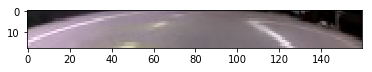

In [6]:
images.shape, plt.imshow(images[104])

In [7]:
#convert labels to np.array
labels = np.array(labels)
labels_val = np.array(labels_val)

In [8]:
#convert datas to dummyvalues
labelsd = pd.get_dummies(labels)

In [9]:
labelsd.shape, labelsd

((721, 2),      0  1
 0    1  0
 1    1  0
 2    1  0
 3    1  0
 4    1  0
 5    1  0
 6    1  0
 7    1  0
 8    1  0
 9    1  0
 10   1  0
 11   1  0
 12   1  0
 13   1  0
 14   1  0
 15   1  0
 16   1  0
 17   1  0
 18   1  0
 19   1  0
 20   1  0
 21   1  0
 22   1  0
 23   1  0
 24   1  0
 25   1  0
 26   1  0
 27   1  0
 28   1  0
 29   1  0
 ..  .. ..
 691  0  1
 692  0  1
 693  0  1
 694  0  1
 695  0  1
 696  0  1
 697  0  1
 698  0  1
 699  0  1
 700  0  1
 701  0  1
 702  0  1
 703  0  1
 704  0  1
 705  0  1
 706  0  1
 707  0  1
 708  0  1
 709  0  1
 710  0  1
 711  0  1
 712  0  1
 713  0  1
 714  0  1
 715  0  1
 716  0  1
 717  0  1
 718  0  1
 719  0  1
 720  0  1
 
 [721 rows x 2 columns])

In [10]:
#convert to np.array again
labelsd = np.array(labelsd)

In [11]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [12]:
#from keras.models import load_model
#model = load_model('model-anticipation.h5')

In [35]:
K.clear_session()

img_in = Input(shape=(18, 160, 3), name='img_in')

x = img_in

x = Convolution2D(8, (4,4), strides=(4,4), activation='relu')(x)
x = Convolution2D(8, (4,4), strides=(4,4), activation='relu')(x)
#x = Convolution2D(8, (4,4), strides=(4,4), activation='relu')(x)
#x = Convolution2D(128, (3,3), strides=(4,4), activation='relu')(x)

flat = Flatten()(x)

x = Dense(20)(flat)
x = Activation('relu')(x)

#categorical output
out = Dense(2, activation='softmax')(x)

model = Model(inputs=[img_in], outputs=[out])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 18, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 40, 8)          392       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 10, 8)          1032      
_________________________________________________________________
flatten_1 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1620      
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total para

In [37]:
h = model.fit(images, labelsd, batch_size=32, epochs=400, verbose=1)

Epoch 1/200
721/721 [==============================] - 0s - loss: 0.6561 - acc: 0.6394     
Epoch 2/200
721/721 [==============================] - 0s - loss: 0.6313 - acc: 0.6394     
Epoch 3/200
721/721 [==============================] - 0s - loss: 0.5977 - acc: 0.6574     
Epoch 4/200
721/721 [==============================] - 0s - loss: 0.5712 - acc: 0.7004     
Epoch 5/200
721/721 [==============================] - 0s - loss: 0.5571 - acc: 0.6907     
Epoch 6/200
721/721 [==============================] - 0s - loss: 0.5347 - acc: 0.7434     
Epoch 7/200
721/721 [==============================] - 0s - loss: 0.5264 - acc: 0.7268     
Epoch 8/200
721/721 [==============================] - 0s - loss: 0.4999 - acc: 0.7503     
Epoch 9/200
721/721 [==============================] - 0s - loss: 0.4866 - acc: 0.7809     
Epoch 10/200
721/721 [==============================] - 0s - loss: 0.4774 - acc: 0.7753     - ETA: 0s - loss: 0.4752 - acc: 0.773
Epoch 11/200
721/721 [====================

721/721 [==============================] - 0s - loss: 0.1556 - acc: 0.9515     
Epoch 89/200
721/721 [==============================] - 0s - loss: 0.1482 - acc: 0.9501     
Epoch 90/200
721/721 [==============================] - 0s - loss: 0.1467 - acc: 0.9556     
Epoch 91/200
721/721 [==============================] - 0s - loss: 0.1555 - acc: 0.9320     
Epoch 92/200
721/721 [==============================] - 0s - loss: 0.1575 - acc: 0.9431     
Epoch 93/200
721/721 [==============================] - 0s - loss: 0.1410 - acc: 0.9598     
Epoch 94/200
721/721 [==============================] - 0s - loss: 0.1369 - acc: 0.9570     
Epoch 95/200
721/721 [==============================] - 0s - loss: 0.1596 - acc: 0.9390     
Epoch 96/200
721/721 [==============================] - 0s - loss: 0.1530 - acc: 0.9417     
Epoch 97/200
721/721 [==============================] - 0s - loss: 0.1418 - acc: 0.9515     
Epoch 98/200
721/721 [==============================] - 0s - loss: 0.1358 - acc: 0.

721/721 [==============================] - 0s - loss: 0.0183 - acc: 0.9986     
Epoch 176/200
721/721 [==============================] - 0s - loss: 0.0151 - acc: 1.0000     
Epoch 177/200
721/721 [==============================] - 0s - loss: 0.0151 - acc: 0.9986     
Epoch 178/200
721/721 [==============================] - 0s - loss: 0.0141 - acc: 1.0000     
Epoch 179/200
721/721 [==============================] - 0s - loss: 0.0153 - acc: 1.0000     
Epoch 180/200
721/721 [==============================] - 0s - loss: 0.0132 - acc: 1.0000     
Epoch 181/200
721/721 [==============================] - 0s - loss: 0.0160 - acc: 1.0000     
Epoch 182/200
721/721 [==============================] - 0s - loss: 0.0149 - acc: 1.0000     
Epoch 183/200
721/721 [==============================] - 0s - loss: 0.0127 - acc: 1.0000     
Epoch 184/200
721/721 [==============================] - 0s - loss: 0.0125 - acc: 1.0000     
Epoch 185/200
721/721 [==============================] - 0s - loss: 0.0128

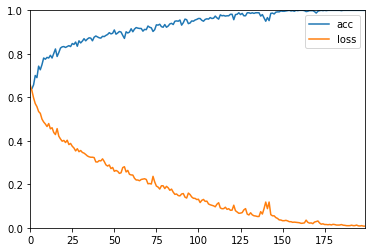

In [42]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [43]:
# Get predictions
all_preds = np.argmax(model.predict(images_val), axis=1)

all_preds, labels_val

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  

In [44]:
import math
i = 0
res = 0
for value in all_preds:
    if value != labels_val[i]:
        res = res + 1
    i = i + 1
res/i

0.1870967741935484

In [45]:
model.save('model-'+dataset+'-anticipation_clean.h5')